In [ ]:
import pandas as pd
df = pd.read_csv('../post.csv', parse_dates=['created_at'])
df = df.dropna(subset=["full_text"])
df.info()
df.head(5)

In [2]:
# Convert timestamps to Timestamps and drop invalid dates
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df = df = df.dropna(subset=["created_at"])

In [ ]:
df.describe()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
# 2. Vectorize all tweets at once
vec = CountVectorizer(token_pattern=r"\b\w+\b", lowercase=True)
X = vec.fit_transform(df["full_text"])     # sparse matrix: (n_tweets × n_terms)

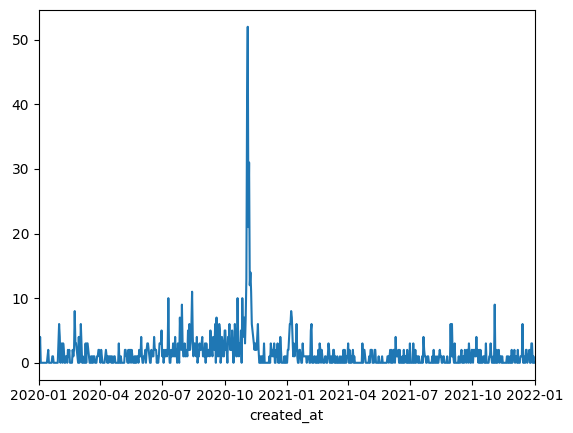

In [14]:
import matplotlib.pyplot as plt
import datetime as dt
word = "election"
start_date = dt.date(2020, 1, 1)
end_date = dt.date(2022, 1, 1)

df["matches"] = df["full_text"].str.lower().str.count(rf"\b{word}\b")
daily = df.groupby(df["created_at"].dt.date)["matches"].sum()
graph = daily.plot()
graph.set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
plt.show()

In [ ]:
# 3. Build a sparse DataFrame with dates as the index
# TAKES VERY LONG TO RUN
counts_df = pd.DataFrame.sparse.from_spmatrix(
    X,
    index=df["created_at"],
    columns=vec.get_feature_names_out()
)

# 4. Sum over tweets for each date
daily_counts = counts_df.groupby(level=0).sum()

# 5. Plot your term
daily_counts["python"].plot(kind="line")